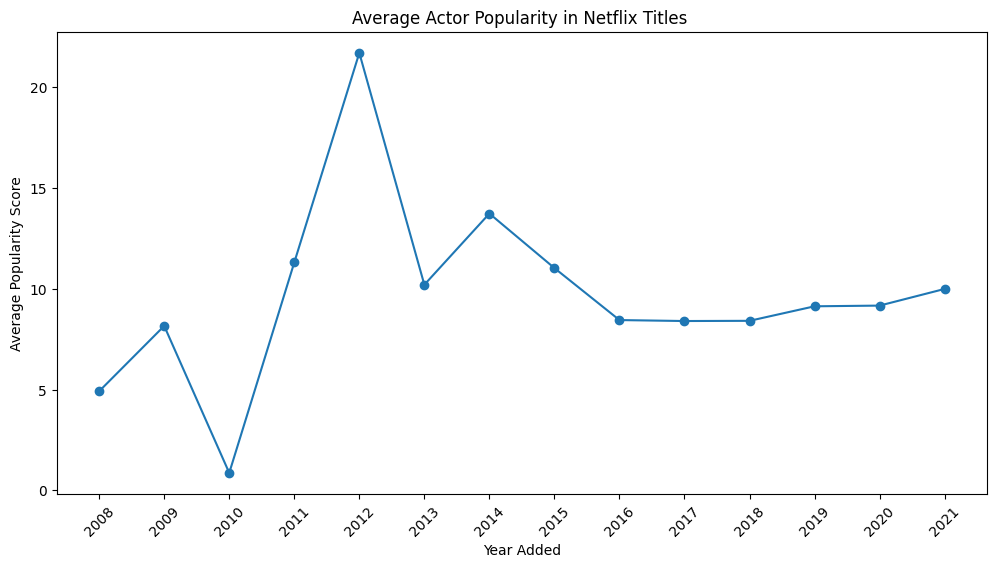

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Load the dataset
df = pd.read_csv('../data/netflix_titles.csv')

# Convert 'date_added' to datetime and extract the year
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year

# Drop rows where 'year_added' is missing
df.dropna(subset=['year_added'], inplace=True)

# Load the popularity scores JSON
with open('../data/popularity.json', 'r') as file:
    popularity_scores = json.load(file)

# Handle multi-value 'cast' field by splitting and exploding
df['cast_list'] = df['cast'].str.split(', ')
df_exploded = df.explode('cast_list')

# Map popularity scores to each actor
df_exploded['actor_popularity'] = df_exploded['cast_list'].map(lambda x: popularity_scores.get(x, None))

# Drop rows with missing actor popularity
df_exploded.dropna(subset=['actor_popularity'], inplace=True)


# Group by title and year added, then calculate the average popularity score
average_popularity_per_title = df_exploded.groupby(['title', 'year_added'])['actor_popularity'].mean().reset_index()

# Now group by year and calculate the average popularity score across all titles
average_popularity_per_year = average_popularity_per_title.groupby('year_added')['actor_popularity'].mean()

# Plotting
plt.figure(figsize=(12, 6))
average_popularity_per_year.plot(kind='line', marker='o')
plt.title('Average Actor Popularity in Netflix Titles ')
plt.xlabel('Year Added')
plt.ylabel('Average Popularity Score')
plt.xticks(range(2008, 2022), rotation=45)
plt.show()
